<a href="https://colab.research.google.com/github/Akhila0714/AIML/blob/main/lab%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (17.9 MB)
  Preparing metadata (setup.py) ... done


In [10]:
import pandas as pd

# Updated URL for the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)

<ipython-input-17-70287048b3e9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)


In [18]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

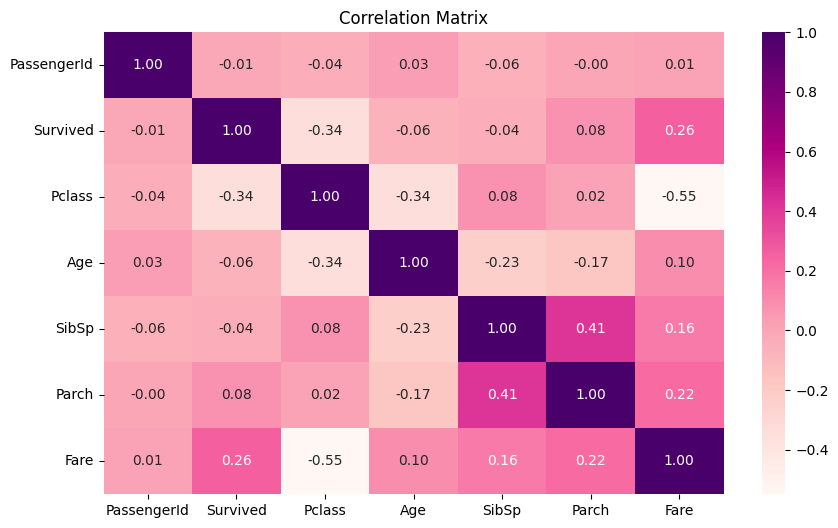

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='RdPu',fmt='.2f',cbar=True)
plt.title('Correlation Matrix')
plt.show()

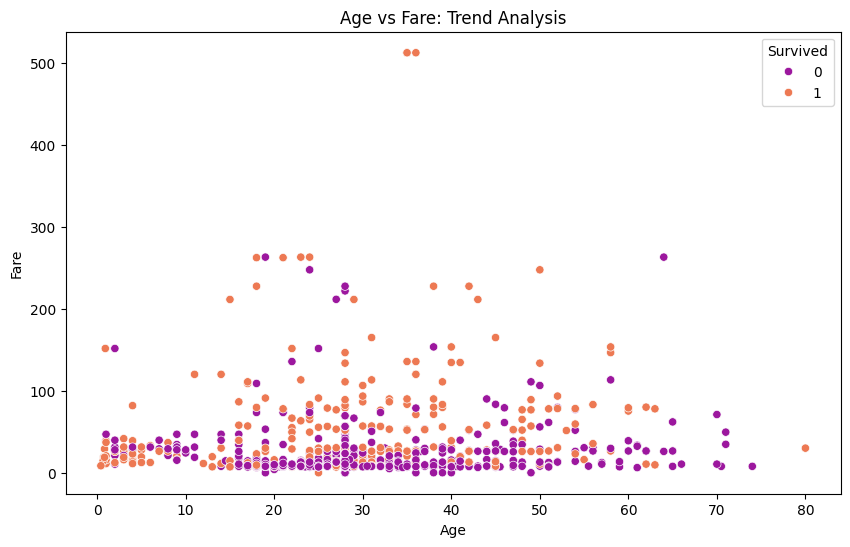

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Fare',data=data,hue='Survived',palette='plasma')
plt.title('Age vs Fare: Trend Analysis')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


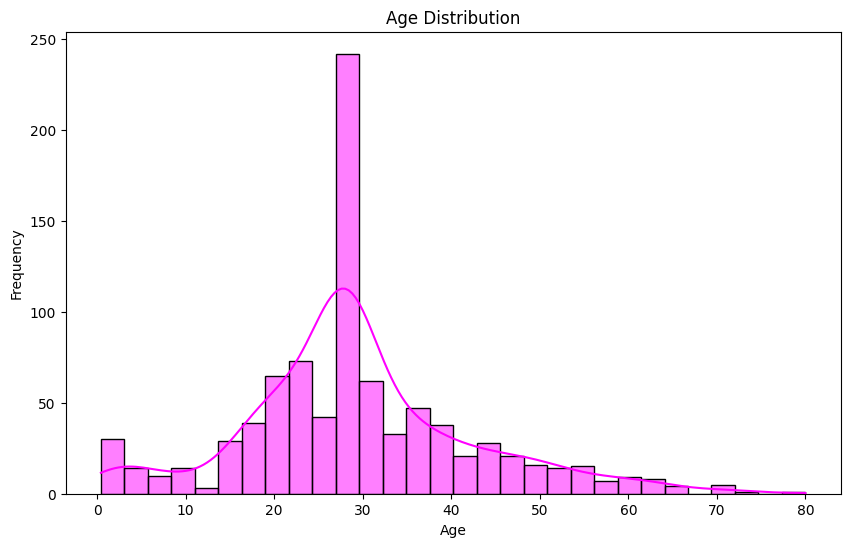

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'],bins=30,kde=True,color='magenta')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

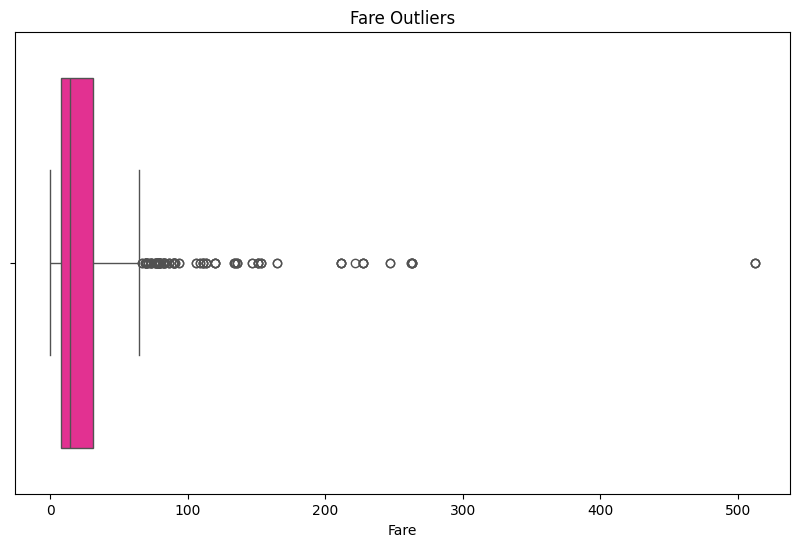

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Fare'],color='deeppink')
plt.title('Fare Outliers')
plt.xlabel('Fare')
plt.show()

<ipython-input-41-55e3b20f9fc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=data, palette='spring')


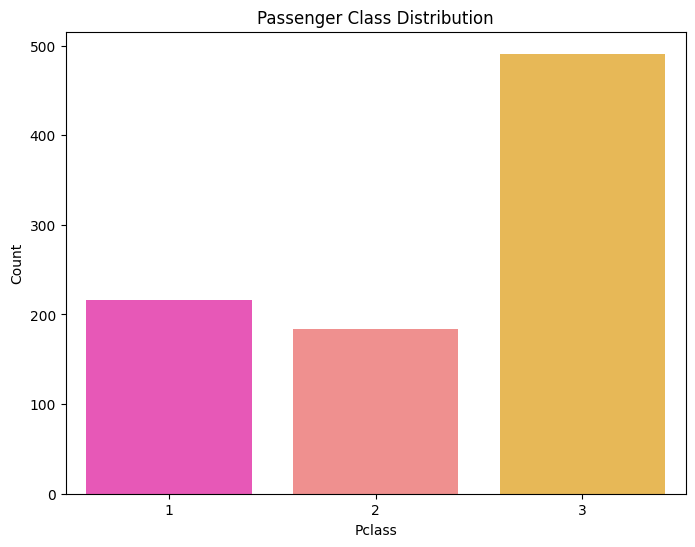

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data, palette='spring')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

<ipython-input-43-7aa28071f828>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='Spectral')


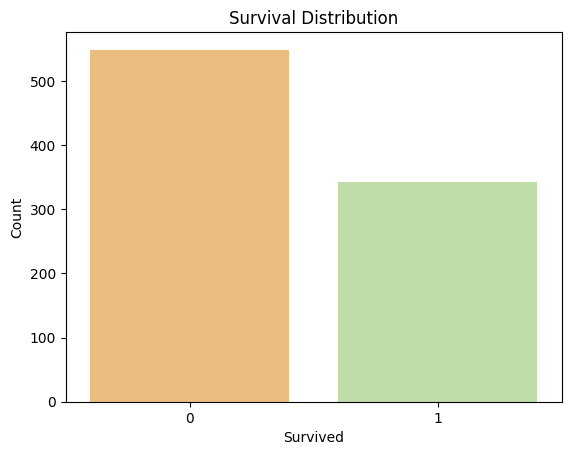

In [43]:
sns.countplot(x='Survived', data=data, palette='Spectral')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [3]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport
# Generate the EDA report
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
# Display the report (this will open in a new tab in Colab)
profile.to_widgets()  # For an interactive widget view
# Or:
profile.to_file("titanic_eda_report.html")  # Save report as HTML file

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (17.9 MB)
  Preparing metadata (setup.py) ... done


PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.10/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.10/u/import-error